In [1]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#import the dataset
df=pd.read_csv('Data_From_China_Oilfield.csv')
df.head()

,year,y,x1,x2,x3,x4,x5,x6,x7,x8
0,1983,1442800,689,612,311,2375900,41.80,1.45,9.07,1421900
1,1984,1417200,855,720,351,2305000,42.33,1.53,9.54,1442800
2,1985,1466100,1028,874,426,2765900,42.93,1.60,9.49,1417200
3,1986,1454500,1268,1087,472,3306400,46.21,1.55,10.25,1466100
4,1987,1489400,1446,1197,652,3981400,45.80,1.49,9.35,1454500


<b>1.1 Perform data exploration</b>

In [3]:
#shape
df.shape

(24, 10)

In [4]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    24 non-null     int64  
 1   y       24 non-null     int64  
 2   x1      24 non-null     int64  
 3   x2      24 non-null     int64  
 4   x3      24 non-null     int64  
 5   x4      24 non-null     int64  
 6   x5      24 non-null     float64
 7   x6      24 non-null     float64
 8   x7      24 non-null     float64
 9   x8      24 non-null     int64  
dtypes: float64(3), int64(7)
memory usage: 2.0 KB


In [5]:
#check for null
df.isnull().sum()

year    0
y       0
x1      0
x2      0
x3      0
x4      0
x5      0
x6      0
x7      0
x8      0
dtype: int64

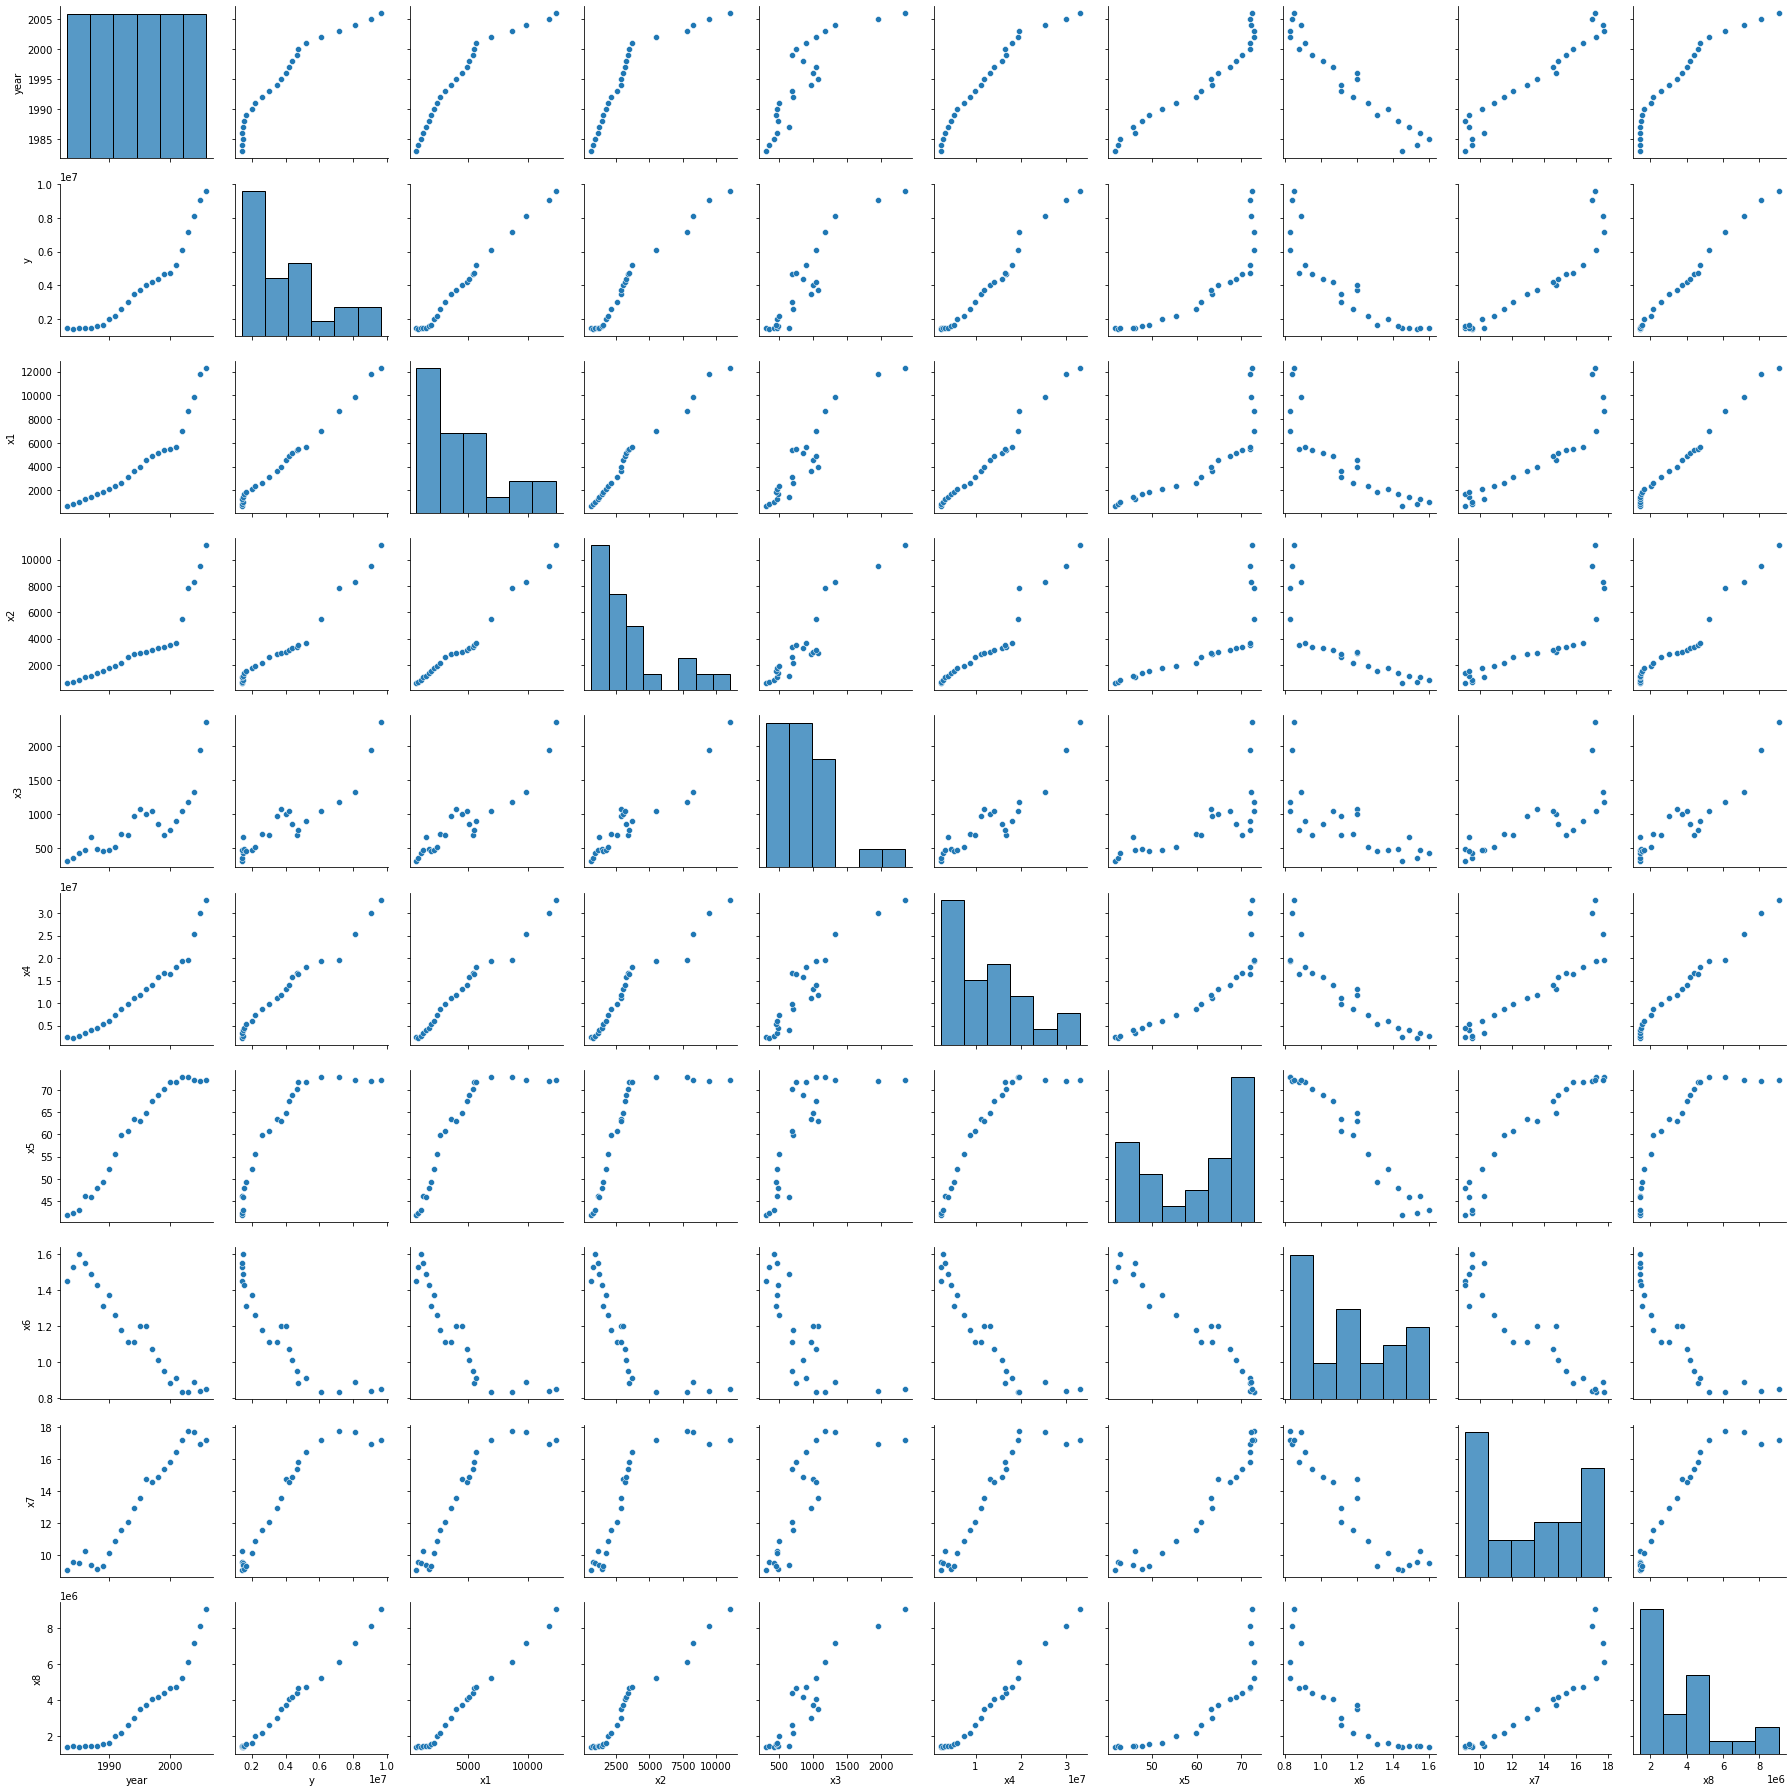

In [6]:
#plot pairplot
sns.pairplot(df)
plt.tight_layout()
plt.show()

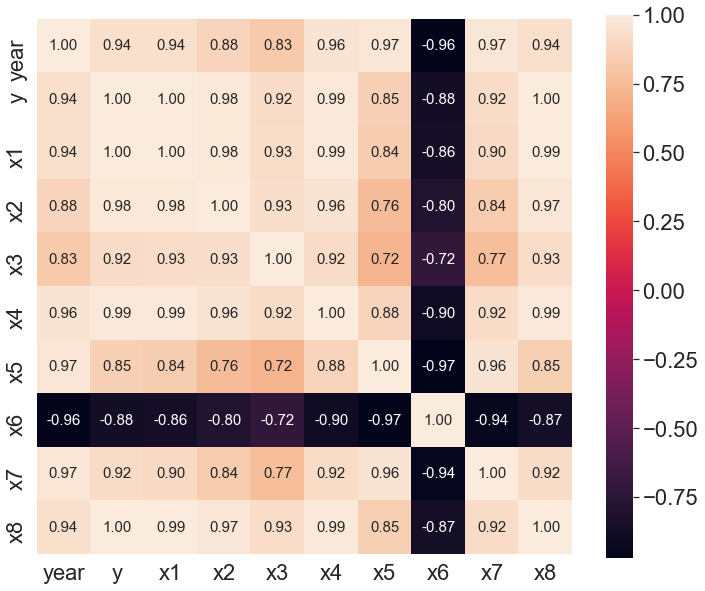

In [72]:
#corr coeff.
cm = np.corrcoef(df.values.T)
all_columns = list(df.columns)
# plot correlation matrix
plt.figure(figsize=(12, 10))
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, annot_kws={'size': 15},
                 fmt='.2f', yticklabels=all_columns, xticklabels=all_columns)
plt.show()

In [8]:
#preprocessing
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))

<b>1.2 Train a linear regression model using the 8 variables and data from the year 1983-1999.
Predict the solution from the year 2000-2006. Compare the actual and the predicted solutions.</b>

In [9]:
#filtering data from 1983 to 1999
df_=df[(df['year']>=1983) & (df['year']<=1999)]

In [10]:
df_.head()

,year,y,x1,x2,x3,x4,x5,x6,x7,x8
0,1983,1442800,689,612,311,2375900,41.80,1.45,9.07,1421900
1,1984,1417200,855,720,351,2305000,42.33,1.53,9.54,1442800
2,1985,1466100,1028,874,426,2765900,42.93,1.60,9.49,1417200
3,1986,1454500,1268,1087,472,3306400,46.21,1.55,10.25,1466100
4,1987,1489400,1446,1197,652,3981400,45.80,1.49,9.35,1454500


In [11]:
#data from 1983 to 1999
#drop year
df_=df_.drop(['year'], axis=1)
#scaler fit_transform the data
df_scaled_=scaler.fit_transform(df_)
#scaled data into dataframe
df_scaled_train=pd.DataFrame(df_scaled_)
#assigning columns to the dataframe
df_scaled_train.columns=df_.columns
df_scaled_train.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8
0,0.007920,0.000000,0.000000,0.000000,0.004905,0.000000,0.769231,0.000000,0.001577
1,0.000000,0.035237,0.039088,0.052493,0.000000,0.018715,0.892308,0.074250,0.008588
2,0.015128,0.071959,0.094824,0.150919,0.031884,0.039901,1.000000,0.066351,0.000000
3,0.011539,0.122904,0.171915,0.211286,0.069276,0.155720,0.923077,0.186414,0.016404
4,0.022336,0.160688,0.211726,0.447507,0.115971,0.141243,0.830769,0.044234,0.012513


In [12]:
#data from 2000 to 2006
_df=df[(df['year']>=2000) & (df['year']<=2006)]

In [13]:
_df

,year,y,x1,x2,x3,x4,x5,x6,x7,x8
17,2000,4712500,5524,3497,758,16519000,71.88,0.88,15.82,4649700
18,2001,5205000,5653,3704,891,18083400,71.88,0.91,16.46,4712500
19,2002,6115500,6958,5523,1043,19267300,72.95,0.83,17.22,5205000
20,2003,7158700,8680,7805,1181,19580500,72.83,0.83,17.74,6115500
21,2004,8109500,9864,8263,1319,25365000,72.28,0.89,17.71,7158700
22,2005,9051000,11805,9522,1946,30032000,72.01,0.84,16.98,8109500
23,2006,9623000,12314,11092,2347,32987000,72.31,0.85,17.20,9051000


In [14]:
#data from 2000 to 2006
#drop year
_df=_df.drop(['year'], axis=1)
#scaler fit_transform the data
_df_scaled=scaler.fit_transform(_df)
#scaled data into dataframe
df_scaled_test=pd.DataFrame(_df_scaled)
#assigning columns to the dataframe
df_scaled_test.columns=_df.columns
df_scaled_test.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.625,0.000000,0.000000
1,0.100295,0.018999,0.027255,0.083700,0.094996,0.000000,1.000,0.333333,0.014269
2,0.285714,0.211193,0.266754,0.179358,0.166887,1.000000,0.000,0.729167,0.126167
3,0.498157,0.464801,0.567215,0.266205,0.185906,0.887850,0.000,1.000000,0.333038
4,0.691783,0.639175,0.627518,0.353052,0.537163,0.373832,0.750,0.984375,0.570059


In [15]:
#X features for test
X_testing=df_scaled_test.drop(['y'], axis=1)

In [16]:
X_testing.head()

,x1,x2,x3,x4,x5,x6,x7,x8
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.625,0.000000,0.000000
1,0.018999,0.027255,0.083700,0.094996,0.000000,1.000,0.333333,0.014269
2,0.211193,0.266754,0.179358,0.166887,1.000000,0.000,0.729167,0.126167
3,0.464801,0.567215,0.266205,0.185906,0.887850,0.000,1.000000,0.333038
4,0.639175,0.627518,0.353052,0.537163,0.373832,0.750,0.984375,0.570059


In [17]:
#y features for test
y_testing=df_scaled_test['y']
y_testing.head()

0    0.000000
1    0.100295
2    0.285714
3    0.498157
4    0.691783
Name: y, dtype: float64

In [18]:
#x features for train
X_training=df_scaled_train.drop(['y'], axis=1)
X_training.head()

,x1,x2,x3,x4,x5,x6,x7,x8
0,0.000000,0.000000,0.000000,0.004905,0.000000,0.769231,0.000000,0.001577
1,0.035237,0.039088,0.052493,0.000000,0.018715,0.892308,0.074250,0.008588
2,0.071959,0.094824,0.150919,0.031884,0.039901,1.000000,0.066351,0.000000
3,0.122904,0.171915,0.211286,0.069276,0.155720,0.923077,0.186414,0.016404
4,0.160688,0.211726,0.447507,0.115971,0.141243,0.830769,0.044234,0.012513


In [19]:
#y features for test
y_training=df_scaled_train['y']
y_training.head()

0    0.007920
1    0.000000
2    0.015128
3    0.011539
4    0.022336
Name: y, dtype: float64

In [20]:
#The next step in training a model is to split data to training and testing.
from sklearn.model_selection import train_test_split
seed= 1000
np.random.seed(seed)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = X_training,X_testing,y_training,y_testing

In [21]:
#defining train_test_split_() method to split train & test data and for code reusability
def train_test_split_(X,y):
    seed=1000
    np.random.seed(seed)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

In [23]:
#defining build_model() method to build the model and for code reusability
def build_model(X_train,y_train,X_training):
    np.random.seed(seed)
    #linear model
    lm = LinearRegression()
    #fit the model
    lm.fit(X_train,y_train)
    print("Linear Regression Intercept :", lm.intercept_)
    coeff_df = pd.DataFrame(lm.coef_,X_training.columns,columns=['Coefficient'])
    return lm, coeff_df

In [24]:
#build and train the model
lm, coeff_df=build_model(X_train,y_train,X_training)

Linear Regression Intercept : 0.03396694422183355


In [25]:
coeff_df

,Coefficient
x1,-0.593882
x2,0.445257
x3,0.023217
x4,0.530535
x5,-0.225632
x6,-0.062176
x7,0.269140
x8,0.529151


Text(0.5, 1.0, 'Actual Vs. Predicted Training')

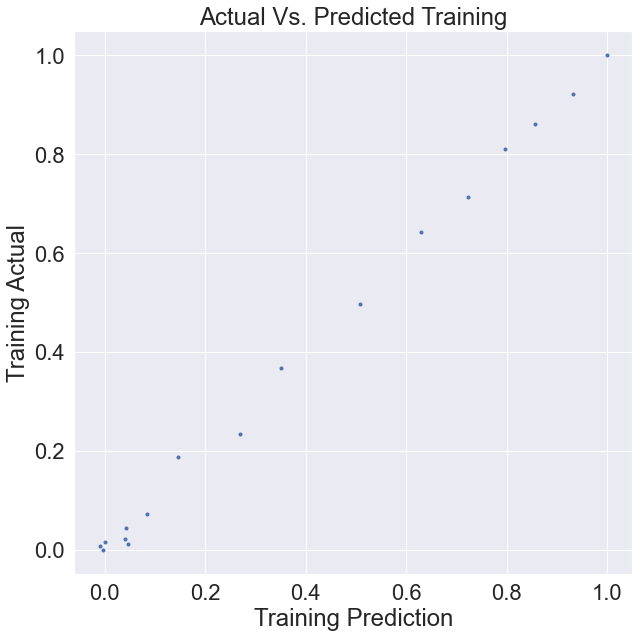

In [26]:
#predict: train
y_prediction=lm.predict(X_train)
#plot
plt.figure(figsize=(10, 10))
plt.plot(y_prediction, y_train, 'b.')
plt.xlabel('Training Prediction')
plt.ylabel('Training Actual')
plt.title('Actual Vs. Predicted Training')

Text(0.5, 1.0, 'Actual Vs. Predicted, Testing Data Set')

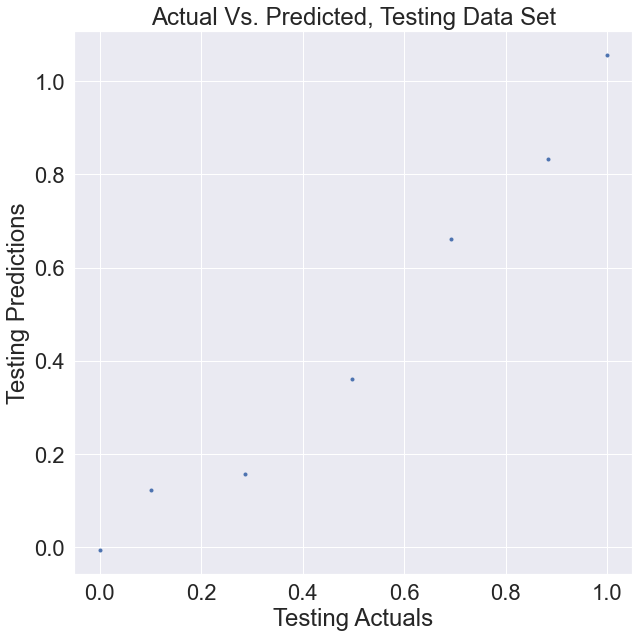

In [27]:
#predict: test
y_pred = lm.predict(X_testing)
#plot
plt.figure(figsize=(10, 10))
plt.plot(y_testing,y_pred, 'b.')
plt.xlabel('Testing Actuals')
plt.ylabel('Testing Predictions')
plt.title('Actual Vs. Predicted, Testing Data Set')

In [28]:
from sklearn.metrics import r2_score
test_set_r2 = r2_score(y_testing,y_pred)
print('Testing r^2:',round(test_set_r2,4))

Testing r^2: 0.9524


In [29]:
train_set_r2 = r2_score(y_prediction, y_train)
print('Train r^2:',round(train_set_r2,4))

Train r^2: 0.9973


In [30]:
#defining calculate_metrics() method to calulate MAE,MSE & RMSE and for code reusability
def calculate_metrics(y,y_pred):
    mae=round(metrics.mean_absolute_error(y, y_pred),5)
    mse=round(metrics.mean_squared_error(y, y_pred),5)
    rmse=round(np.sqrt(metrics.mean_squared_error(y, y_pred)),5)
    return mae, mse, rmse

In [31]:
mae_,mse_,rmse_=calculate_metrics(y_train, y_prediction)
print('Metrics for Training: ','\n''MAE:',mae_,'\n''MSE: ', mse_,'\n''RMSE: ', rmse_)

Metrics for Training:  
MAE: 0.01496 
MSE:  0.00036 
RMSE:  0.01897


In [32]:
mae,mse,rmse=calculate_metrics(y_testing, y_pred)
print('Metrics for Testing: ','\n''MAE:',mae,'\n''MSE: ', mse,'\n''RMSE: ', rmse)

Metrics for Testing:  
MAE: 0.06104 
MSE:  0.00605 
RMSE:  0.07779


<AxesSubplot:xlabel='y', ylabel='Density'>

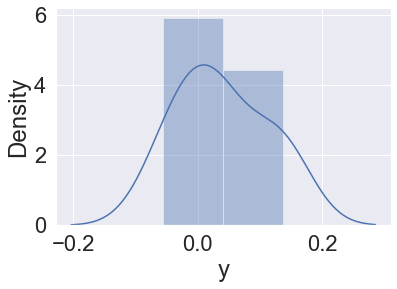

In [33]:
sns.distplot((y_testing-y_pred))

<b>1.3 Use the following four variables only and repeat the model training. Compare the error
between using 8 variable model and 4 variable (X2, X4, X5, X7) model to see which model is better.
</b>

In [34]:
#select x2,x4,x5,x7 features 
df_new=df[['x2','x4','x5','x7','y']]
#scaler fit_transform
df_new_scaled=scaler.fit_transform(df_new)
#scaled data to dataframe
df_new_scaled_test=pd.DataFrame(df_new_scaled)
#assigning columns to dataframe
df_new_scaled_test.columns=df_new.columns
df_new_scaled_test.head()

,x2,x4,x5,x7,y
0,0.000000,0.002311,0.000000,0.000000,0.003120
1,0.010305,0.000000,0.017014,0.054210,0.000000
2,0.025000,0.015022,0.036276,0.048443,0.005959
3,0.045324,0.032638,0.141573,0.136101,0.004546
4,0.055821,0.054638,0.128411,0.032295,0.008799


In [35]:
#x features test
X=df_new_scaled_test.drop(['y'], axis=1)
X.head()

,x2,x4,x5,x7
0,0.000000,0.002311,0.000000,0.000000
1,0.010305,0.000000,0.017014,0.054210
2,0.025000,0.015022,0.036276,0.048443
3,0.045324,0.032638,0.141573,0.136101
4,0.055821,0.054638,0.128411,0.032295


In [36]:
#y features for test
y=df_new_scaled_test['y']
y.head()

0    0.003120
1    0.000000
2    0.005959
3    0.004546
4    0.008799
Name: y, dtype: float64

In [37]:
#split the test & train data
X_train_, X_test_, y_train_, y_test_=train_test_split_(X,y)

In [38]:
#build and train the model
lm_, coeff_df_=build_model(X_train_,y_train_,X)

Linear Regression Intercept : -0.017481704660546327


In [39]:
coeff_df_

,Coefficient
x2,0.463637
x4,0.480519
x5,-0.153166
x7,0.281658


Text(0.5, 1.0, 'Actual Vs. Predicted Training')

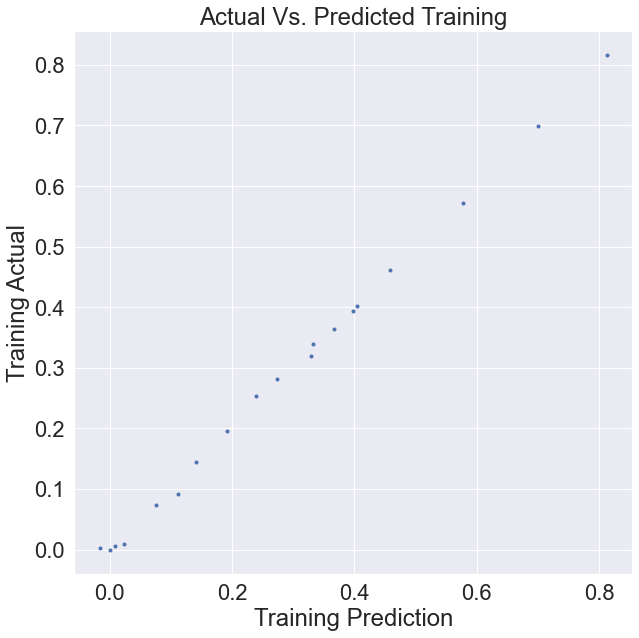

In [40]:
#predict train
y_prediction_=lm_.predict(X_train_)
#plot
plt.figure(figsize=(10, 10))
plt.plot(y_prediction_, y_train_, 'b.')
plt.xlabel('Training Prediction')
plt.ylabel('Training Actual')
plt.title('Actual Vs. Predicted Training')

Text(0.5, 1.0, 'Actual Vs. Predicted Testing')

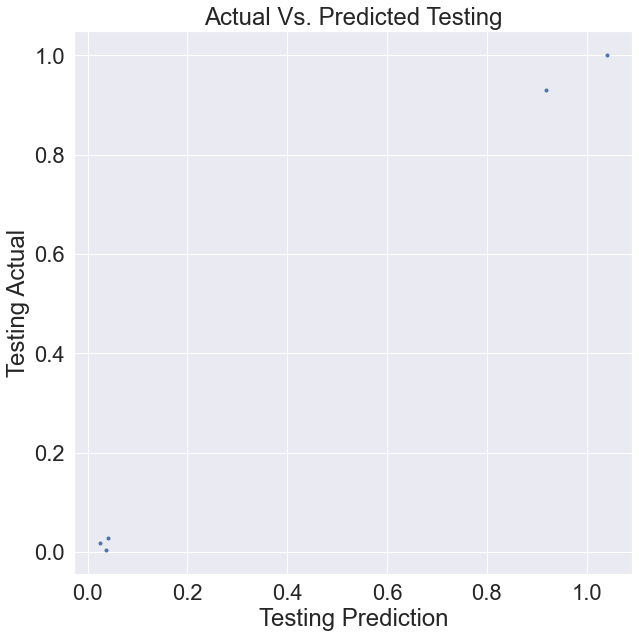

In [41]:
#predict:test
y_pred_=lm_.predict(X_test_)
#plot
plt.figure(figsize=(10, 10))
plt.plot(y_pred_, y_test_, 'b.')
plt.xlabel('Testing Prediction')
plt.ylabel('Testing Actual')
plt.title('Actual Vs. Predicted Testing')

In [42]:
train_set_r2_ = r2_score(y_prediction_, y_train_)
print('Train r^2:',round(train_set_r2_,4))

Train r^2: 0.9986


In [43]:
test_set_r2_ = r2_score(y_pred_, y_test_)
print('Test r^2:',round(test_set_r2_,4))

Test r^2: 0.9973


In [44]:
mae,mse,rmse=calculate_metrics(y_test_, y_pred_)
print('Metrics for Testing: ','\n''MAE:',mae,'\n''MSE: ', mse,'\n''RMSE: ', rmse)

Metrics for Testing:  
MAE: 0.02028 
MSE:  0.00059 
RMSE:  0.02426


<AxesSubplot:xlabel='y', ylabel='Density'>

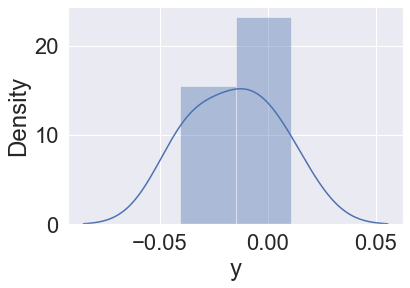

In [45]:
sns.distplot((y_test_-y_pred_))

This model (model with x2,x4,x5,x7 as features) perform better than previous model

<b>1.4. Use the 4 variable model from the previous training data and a new model trained from
the “China_Oilfield_2.csv” data from the year 1983-1999 to predict the production between
2000-2006 and compare the error to see which model performs better.</b>

In [46]:
#import the dataset
df_new=pd.read_csv('Data_From_China_Oilfield_2.csv')
df_new.head()

,year,ynew,x2new,x4new,x5new,x7new
0,1983,1352300,407,1564500,40.96,8.92
1,1984,1326700,515,1493600,41.49,9.39
2,1985,1375600,669,1954500,42.09,9.34
3,1986,1364000,882,2495000,45.37,10.10
4,1987,1398900,992,3170000,44.96,9.20


In [47]:
#shape
df_new.shape

(24, 6)

In [48]:
#info
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    24 non-null     int64  
 1   ynew    24 non-null     int64  
 2   x2new   24 non-null     int64  
 3   x4new   24 non-null     int64  
 4   x5new   24 non-null     float64
 5   x7new   24 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 1.2 KB


In [49]:
#check for null
df_new.isnull().sum()

year     0
ynew     0
x2new    0
x4new    0
x5new    0
x7new    0
dtype: int64

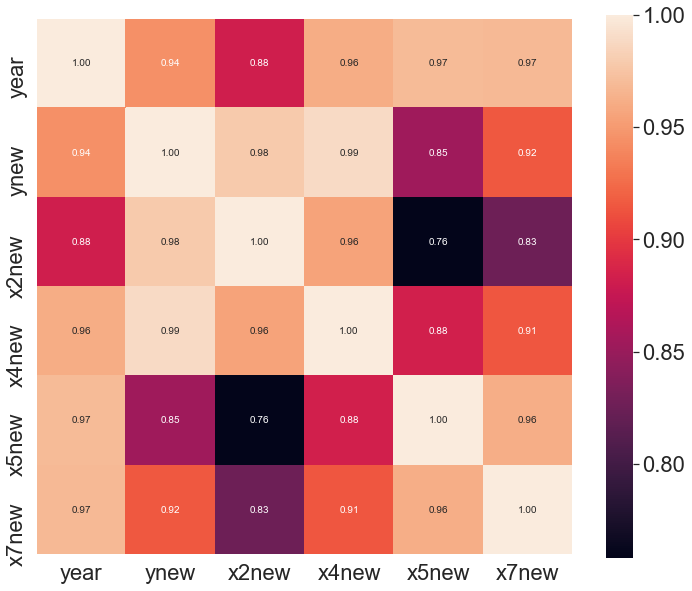

In [79]:
#corr coeff.
cm = np.corrcoef(df_new.values.T)
all_columns = list(df_new.columns)
# plot correlation matrix
plt.figure(figsize=(12, 10))
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, annot_kws={'size': 10},
                 fmt='.2f', yticklabels=all_columns, xticklabels=all_columns)
plt.show()

In [51]:
#preprocessing
from sklearn import preprocessing
scaler_new=preprocessing.MinMaxScaler(feature_range=(0,1))

In [52]:
#data from 1983 to 1999
df_new_83_99=df_new[(df_new['year']>=1983) & (df_new['year']<=1999)]

In [53]:
df_new_83_99.head()

,year,ynew,x2new,x4new,x5new,x7new
0,1983,1352300,407,1564500,40.96,8.92
1,1984,1326700,515,1493600,41.49,9.39
2,1985,1375600,669,1954500,42.09,9.34
3,1986,1364000,882,2495000,45.37,10.10
4,1987,1398900,992,3170000,44.96,9.20


In [54]:
#data from 1983 to 1999
#drop year
df_83_99=df_new_83_99.drop(['year'], axis=1)
#scaler fit_transform the data
df_scaled_83_99=scaler.fit_transform(df_83_99)
#scaled data into dataframe
df_scaled_train_83_99=pd.DataFrame(df_scaled_83_99)
#assigning columns to the dataframe
df_scaled_train_83_99.columns=df_83_99.columns
df_scaled_train_83_99.head()

,ynew,x2new,x4new,x5new,x7new
0,0.007920,0.000000,0.004905,0.000000,0.000000
1,0.000000,0.039088,0.000000,0.018715,0.074250
2,0.015128,0.094824,0.031884,0.039901,0.066351
3,0.011539,0.171915,0.069276,0.155720,0.186414
4,0.022336,0.211726,0.115971,0.141243,0.044234


In [55]:
#filtering data from 2000 to 2006
df_new_00_06=df_new[(df_new['year']>=2000) & (df_new['year']<=2006)]

In [56]:
df_new_00_06.head()

,year,ynew,x2new,x4new,x5new,x7new
17,2000,4622000,3292,15707600,71.04,15.67
18,2001,5114500,3499,17272000,71.04,16.31
19,2002,6025000,5318,18455900,72.11,17.07
20,2003,7068200,7600,18769100,71.99,17.59
21,2004,8019000,8058,24553600,71.44,17.56


In [57]:
#data from 2000 to 2006
#drop year
df_00_06=df_new_00_06.drop(['year'], axis=1)
#scaler fit_transform the data
df_scaled_00_06=scaler.fit_transform(df_00_06)
#scaled data into dataframe
df_scaled_test_00_06=pd.DataFrame(df_scaled_00_06)
#assigning columns to the dataframe
df_scaled_test_00_06.columns=df_00_06.columns
df_scaled_test_00_06.head()

,ynew,x2new,x4new,x5new,x7new
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.100295,0.027255,0.094996,0.000000,0.333333
2,0.285714,0.266754,0.166887,1.000000,0.729167
3,0.498157,0.567215,0.185906,0.887850,1.000000
4,0.691783,0.627518,0.537163,0.373832,0.984375


In [58]:
#x features for test
X_testing_new=df_scaled_test_00_06.drop(['ynew'], axis=1)
X_testing_new.head()

,x2new,x4new,x5new,x7new
0,0.000000,0.000000,0.000000,0.000000
1,0.027255,0.094996,0.000000,0.333333
2,0.266754,0.166887,1.000000,0.729167
3,0.567215,0.185906,0.887850,1.000000
4,0.627518,0.537163,0.373832,0.984375


In [59]:
#y features for test
y_testing_new=df_scaled_test_00_06['ynew']
y_testing_new.head()

0    0.000000
1    0.100295
2    0.285714
3    0.498157
4    0.691783
Name: ynew, dtype: float64

In [60]:
#x features for train
X_training_new=df_scaled_train_83_99.drop(['ynew'], axis=1)
X_training_new.head()

,x2new,x4new,x5new,x7new
0,0.000000,0.004905,0.000000,0.000000
1,0.039088,0.000000,0.018715,0.074250
2,0.094824,0.031884,0.039901,0.066351
3,0.171915,0.069276,0.155720,0.186414
4,0.211726,0.115971,0.141243,0.044234


In [61]:
#y features for train
y_training_new=df_scaled_train_83_99['ynew']
y_training_new.head()

0    0.007920
1    0.000000
2    0.015128
3    0.011539
4    0.022336
Name: ynew, dtype: float64

In [62]:
#split the trai & test data
seed= 1000
np.random.seed(seed)
X_train_new, X_test_new, y_train_new, y_test_new = X_training_new,X_testing_new,y_training_new,y_testing_new

In [63]:
#build and train the model
lm_new, coeff_df_new=build_model(X_train_new,y_train_new,X_training_new)

Linear Regression Intercept : -0.059004927380649774


In [64]:
coeff_df_new

,Coefficient
x2new,0.258042
x4new,0.604361
x5new,-0.294626
x7new,0.506624


Text(0.5, 1.0, 'Actual Vs. Predicted Training')

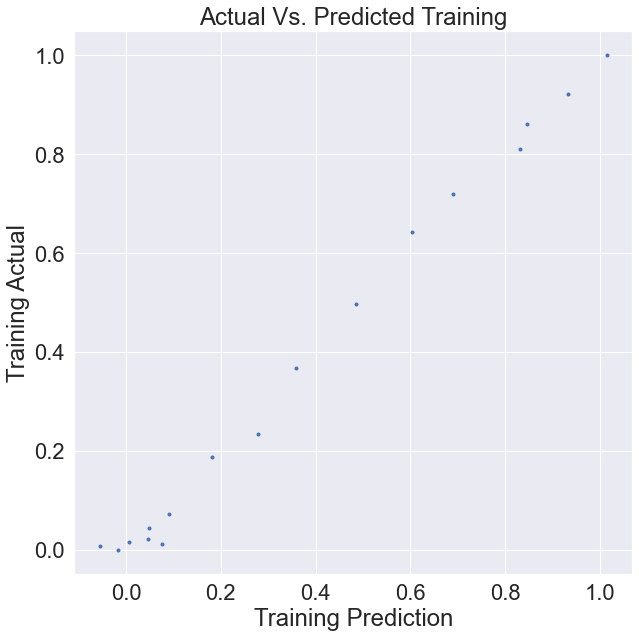

In [65]:
#predict: train
y_pred_train_new=lm_new.predict(X_train_new)
#plot
plt.figure(figsize=(10, 10))
plt.plot(y_pred_train_new, y_train_new, 'b.')
plt.xlabel('Training Prediction')
plt.ylabel('Training Actual')
plt.title('Actual Vs. Predicted Training')

Text(0.5, 1.0, 'Actual Vs. Predicted Testing')

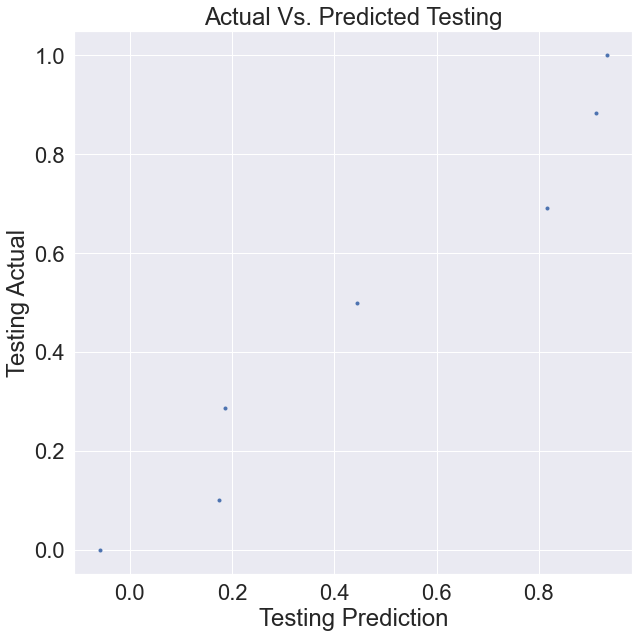

In [66]:
#predict:test
y_pred_test_new=lm_new.predict(X_test_new)
#plot
plt.figure(figsize=(10, 10))
plt.plot(y_pred_test_new, y_test_new, 'b.')
plt.xlabel('Testing Prediction')
plt.ylabel('Testing Actual')
plt.title('Actual Vs. Predicted Testing')

In [67]:
train_set_r2_new = r2_score(y_pred_train_new, y_train_new)
print('Train r^2:',round(train_set_r2_new,4))

Train r^2: 0.9932


In [68]:
test_set_r2_new = r2_score(y_pred_test_new, y_test_new)
print('Test r^2:',round(test_set_r2_new,4))

Test r^2: 0.9564


In [69]:
mae,mse,rmse=calculate_metrics(y_train_new, y_pred_train_new)
print('Metrics for Training: ','\n''MAE:',mae,'\n''MSE: ', mse,'\n''RMSE: ', rmse)

Metrics for Training:  
MAE: 0.02381 
MSE:  0.00089 
RMSE:  0.02986


In [70]:
mae,mse,rmse=calculate_metrics(y_test_new, y_pred_test_new)
print('Metrics for Testing: ','\n''MAE:',mae,'\n''MSE: ', mse,'\n''RMSE: ', rmse)

Metrics for Testing:  
MAE: 0.07234 
MSE:  0.00609 
RMSE:  0.07802


<AxesSubplot:xlabel='ynew', ylabel='Density'>

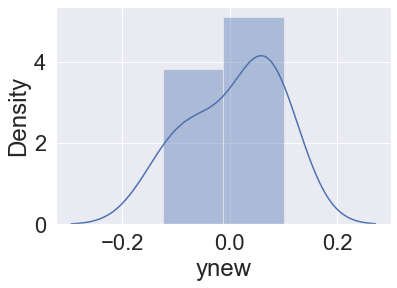

In [71]:
sns.distplot((y_test_new-y_pred_test_new))

Previous model (4 variable) perform better